In [1]:
# Import libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from src.automl_forecasting import load_data, give_dataframe_information, train_and_test_split

In [2]:
give_dataframe_information()

Minimum date: 2014-02-02 00:00:00
Maximum date: 2016-07-31 00:00:00
Length of the DataFrame: 795


In [ ]:
df_forecasting = load_data()

In [ ]:
train, test = 

# CHECK

In [3]:
# Call the main function to save the dataframe
df_sales = data_preparation_forecasting.main()

# Testing

In [63]:
# Call the main function to obtain the dataframes
df_list = data_preparation_forecasting.main()

In [124]:
def load_and_preprocess_data():

    # Call the main function to obtain the dataframes
    df_list = data_preparation_forecasting.main()

    # Exclude the Sales_Value column and only keep the Qty, plus add features
    for i in range(len(df_list)):
        df_list[i] = df_list[i][["Sales_Qty"]]
        df_list[i]["Year"] = df_list[i].index.year
        df_list[i]["Quarter"] = df_list[i].index.quarter
        df_list[i]["Month"] = df_list[i].index.month
        df_list[i]["Day_of_Week"] = df_list[i].index.dayofweek

        # Create lag features for the past 1, 7, and 30 days
        df_list[i]['lag_1_day'] = df_list[i]['Sales_Qty'].shift(1)
        df_list[i]['lag_7_days'] = df_list[i]['Sales_Qty'].shift(7)
        df_list[i]['lag_30_days'] = df_list[i]['Sales_Qty'].shift(30)

        # Drop rows with missing values resulting from the shifting
        df_list[i].dropna(inplace=True)

    # Train and test split, we have 1005 observations and we will take roughly 100 days as test
    dfs_train, dfs_test = [], []

    for i in range(len(df_list)):
        test_set_size = 100
        split_index = len(df_list[i]) - test_set_size
        train_df = df_list[i].iloc[:split_index]
        test_df = df_list[i].iloc[split_index:]
        dfs_train.append(train_df)
        dfs_test.append(test_df)

    return dfs_train, dfs_test

def compute_models(dfs_train, dfs_test):

    # n_estimators = how many trees will it create
    reg = xgb.XGBRegressor(n_estimators = 1000)
    reg.fit


In [125]:
dfs_train, dfs_test = load_and_preprocess_data()

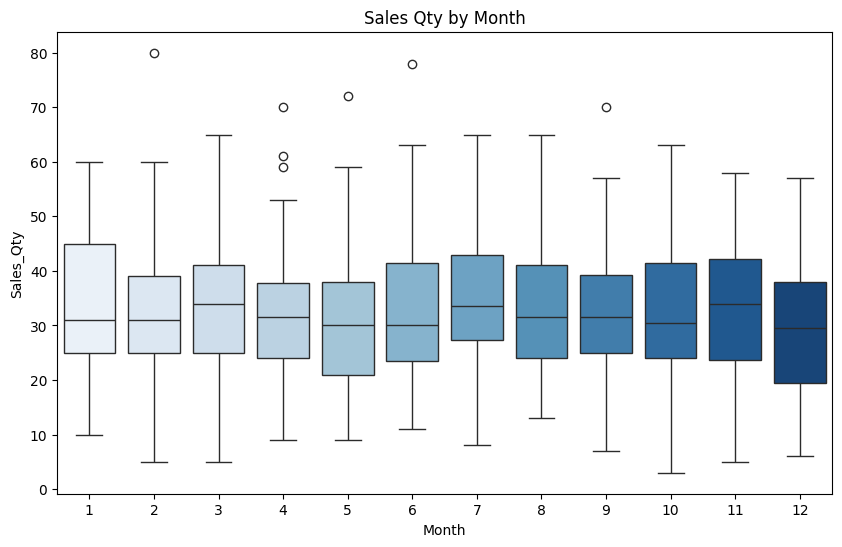

In [126]:
import seaborn as sns

# Plot data
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = dfs_train[2], x = "Month", y = "Sales_Qty", palette = "Blues")
ax.set_title("Sales Qty by Month")
plt.show()

In [127]:
df_train_example = dfs_train[0]
df_train_example.head(5)

,Sales_Qty,Year,Quarter,Month,Day_of_Week,lag_1_day,lag_7_days,lag_30_days
Date,,,,,,,,
2015-01-31,29,2015,1,1,5,24.0,33.0,16.0
2015-02-01,30,2015,1,2,6,29.0,47.0,39.0
2015-02-02,34,2015,1,2,0,30.0,48.0,22.0
2015-02-03,24,2015,1,2,1,34.0,35.0,34.0
2015-02-04,42,2015,1,2,2,24.0,28.0,30.0


In [128]:
df_test_example = dfs_test[0]
df_test_example.head(5)

,Sales_Qty,Year,Quarter,Month,Day_of_Week,lag_1_day,lag_7_days,lag_30_days
Date,,,,,,,,
2017-06-24,20,2017,2,6,5,27.0,31.0,37.0
2017-06-25,25,2017,2,6,6,20.0,27.0,53.0
2017-06-26,22,2017,2,6,0,25.0,34.0,33.0
2017-06-27,32,2017,2,6,1,22.0,29.0,46.0
2017-06-28,21,2017,2,6,2,32.0,39.0,38.0


In [136]:
features = ['Year', 'Quarter', 'Month', 'Day_of_Week', 'lag_1_day', 'lag_7_days', 'lag_30_days']
target = ['Sales_Qty']

In [137]:
X_train = df_train_example[features] 
y_train = df_train_example[target] 

X_test = df_test_example[features] 
y_test = df_test_example[target] 

In [138]:
# n_estimators = how many trees will it create
reg = xgb.XGBRegressor(n_estimators = 100, early_stopping_rounds = 50,
                       learning_rate = 0.001)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = 5)

[0]	validation_0-rmse:11.46907	validation_1-rmse:11.18789
[5]	validation_0-rmse:11.45957	validation_1-rmse:11.18953
[10]	validation_0-rmse:11.45015	validation_1-rmse:11.19162
[15]	validation_0-rmse:11.44080	validation_1-rmse:11.19354
[20]	validation_0-rmse:11.43153	validation_1-rmse:11.19570
[25]	validation_0-rmse:11.42233	validation_1-rmse:11.19768
[30]	validation_0-rmse:11.41321	validation_1-rmse:11.19989
[35]	validation_0-rmse:11.40416	validation_1-rmse:11.20194
[40]	validation_0-rmse:11.39518	validation_1-rmse:11.20421
[45]	validation_0-rmse:11.38627	validation_1-rmse:11.20632
[49]	validation_0-rmse:11.37920	validation_1-rmse:11.20811


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [139]:
feat_imp = pd.DataFrame(data = reg.feature_importances_,
                        index = reg.feature_names_in_,
                        columns = ["Importance"])

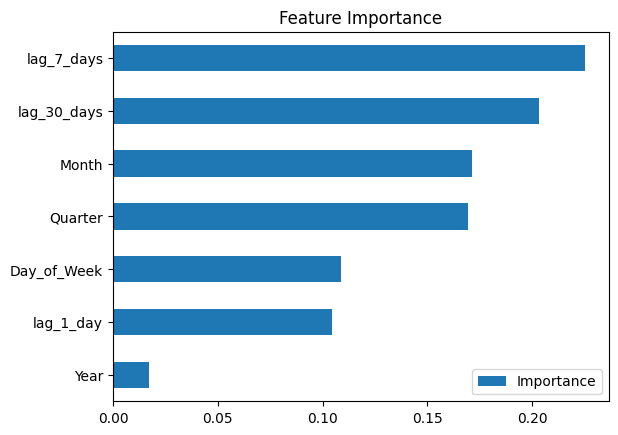

In [140]:
feat_imp.sort_values("Importance").plot(kind = "barh", title = "Feature Importance")
plt.show()

In [141]:
# Make predictions
df_test_example["Prediction"] = reg.predict(X_test)

In [142]:
df = df_list[0]
df = df.merge(df_test_example["Prediction"], how = "left", left_index = True, right_index = True)

In [146]:
df.tail(20)

,Sales_Value,Sales_Qty,Prediction
Date,,,
2017-09-12,1955.879978,25,31.685184
2017-09-13,3073.190002,32,31.685184
2017-09-14,1001.379997,12,31.674004
2017-09-15,3404.389996,43,31.679041
2017-09-16,3347.320019,48,31.679041
2017-09-17,2531.689987,33,31.673872
2017-09-18,1288.489994,16,31.674004
2017-09-19,1346.080002,14,31.685184
2017-09-20,3596.740009,47,31.685184


In [143]:
df[["Sales_Qty"]]

,Sales_Qty
Date,
2015-01-01,16
2015-01-02,39
2015-01-03,22
2015-01-04,34
2015-01-05,30
...,...
2017-09-27,26
2017-09-28,25
2017-09-29,22


In [144]:
df[["Prediction"]]

,Prediction
Date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,NaN
...,...
2017-09-27,31.674004
2017-09-28,31.685184
2017-09-29,31.682102


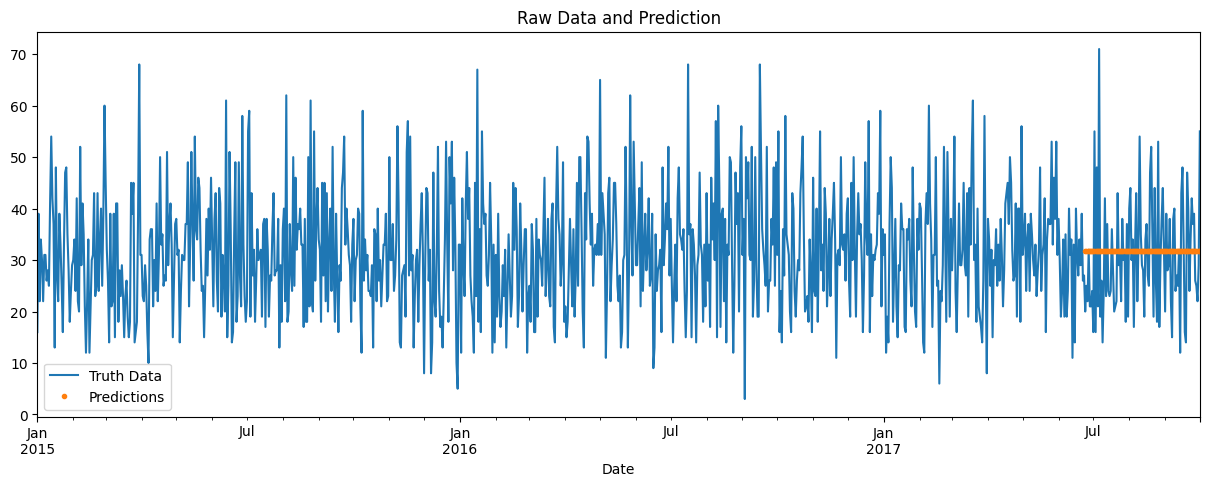

In [145]:
ax = df[["Sales_Qty"]].plot(figsize = (15,5))
df[["Prediction"]].plot(ax = ax, style = ".")
plt.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Data and Prediction")
plt.show()